# User Characteristics Generator

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sb
import matplotlib.pyplot as plt

import googlemaps

In [2]:
towns = pd.read_html("https://en.wikipedia.org/wiki/New_towns_of_Singapore")

In [3]:
towns_1 = towns[0]
towns_2 = towns[1]

In [4]:
towns = pd.concat([towns_1, towns_2], ignore_index = True)
towns.head()

,Name (English/Malay),Chinese,Pinyin,Tamil,Total area (km2),Residential area (km2),Dwelling units,Projected ultimate,Population
0,Ang Mo Kio,宏茂桥,hóngmàoqiáo,ஆங் மோ கியோ,6.38,2.83,50726,58000.0,138200
1,Bedok,勿洛,wùluò,பிடோ,9.37,4.18,62816,79000.0,187900
2,Bishan,碧山,bìshān,பீஷான்,6.90,1.72,20072,34000.0,61100
3,Bukit Batok,武吉巴督,wǔjíbādū,புக்கிட் பாத்தோக்,7.85,2.91,44285,54000.0,121400
4,Bukit Merah,红山,hóngshān,புக்கிட் மேரா,8.58,3.12,54227,68000.0,141400


In [5]:
to_relate = towns.filter(["Name (English/Malay)", "Population"])

In [6]:
to_relate["proportion"] = round(to_relate.Population / to_relate.Population.sum() * 2000)

In [7]:
to_relate

,Name (English/Malay),Population,proportion
0,Ang Mo Kio,138200,85.0
1,Bedok,187900,116.0
2,Bishan,61100,38.0
3,Bukit Batok,121400,75.0
4,Bukit Merah,141400,87.0
5,Bukit Panjang,118900,73.0
6,Choa Chu Kang,167200,103.0
7,Clementi,69500,43.0
8,Geylang,86000,53.0
9,Hougang,179700,111.0


In [8]:
userDf = pd.DataFrame(columns=['userId', 'character', 'age', 'address', 
                               'eatOut', 'drive', 'prRate', 'maxTravel'])

- UserId: Id of the user.
- Character: Strictness of a person when rating a restaurant. Higher = Stricter, Lower = Lenient (Between -0.5 and 0.5).
- Age: Between 18 - 75 (Working adults).
- Address: Generic address of a user (E.g. Tampines, Jurong, etc.), based on the population of Singapore.
- EatOut: Probability of a user going out to eat (Dependent on age)
- Drive: Depends on age. Older -> Higher probability of being able to drive.
- PrRate: Probability of a user rating a restaurant (Dependent on age)
- MaxTravel: Max travel time a user is willing to spend (Dependent on age)

In [9]:
random.seed(123)
towns_copy = to_relate.copy()
for i in range(2000):
    char = round(random.uniform(-0.5,0.5), 2) 
    age = round(random.uniform(18,75))
    a = round(random.uniform(0,len(towns_copy)-1))
    
    while(True):
        if towns_copy.iloc[a,2] > 0:
            address = towns_copy.iloc[a,0]
            towns_copy.iloc[a,2] = towns_copy.iloc[a,2] - 1;
            break
        else:
            a = round(random.uniform(0,len(towns)-1))
    
    if age < 25:
        eatOut = round(np.random.normal(loc=0.75, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.75, scale=0.2),2)
    elif 25 <= age < 35:
        eatOut = round(np.random.normal(loc=0.7, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.7, scale=0.2),2)
    elif 35 <= age < 45:
        eatOut = round(np.random.normal(loc=0.65, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.65, scale=0.2),2)
    elif 45 <= age < 55:
        eatOut = round(np.random.normal(loc=0.6, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.6, scale=0.2),2)
    elif 55 <= age < 65:
        eatOut = round(np.random.normal(loc=0.55, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.55, scale=0.2),2)
    else:
        eatOut = round(np.random.normal(loc=0.5, scale=0.2),2)
        prRate = round(np.random.normal(loc=0.5, scale=0.2),2)
        
    if eatOut > 1:
        eatOut = 1.00
    if eatOut < 0:
        eatOut = 0.00
    
    if prRate > 1:
        prRate = 1.00
    if prRate < 0:
        prRate = 0.00
    
    if age < 25:
        d = round(np.random.normal(loc=0.5, scale=0.2))
    elif 25 <= age < 35:
        d = round(np.random.normal(loc=0.55, scale=0.2))
    elif 35 <= age < 45:
        d = round(np.random.normal(loc=0.6, scale=0.2))
    elif 45 <= age < 55:
        d = round(np.random.normal(loc=0.65, scale=0.2))
    elif 55 <= age < 65:
        d = round(np.random.normal(loc=0.7, scale=0.2))
    else:
        d = round(np.random.normal(loc=0.75, scale=0.2))
        
    if d == 1:
        if age < 25:
            maxTravel = round(np.random.normal(loc=34, scale=1))
        elif 25 <= age < 35:
            maxTravel = round(np.random.normal(loc=32, scale=1))
        elif 35 <= age < 45:
            maxTravel = round(np.random.normal(loc=30, scale=1))
        elif 45 <= age < 55:
            maxTravel = round(np.random.normal(loc=28, scale=1))
        elif 55 <= age < 65:
            maxTravel = round(np.random.normal(loc=26, scale=1))
        else:
            maxTravel = round(np.random.normal(loc=24, scale=1))
    else:
        if age < 25:
            maxTravel = round(np.random.normal(loc=54, scale=1))
        elif 25 <= age < 35:
            maxTravel = round(np.random.normal(loc=52, scale=1))
        elif 35 <= age < 45:
            maxTravel = round(np.random.normal(loc=50, scale=1))
        elif 45 <= age < 55:
            maxTravel = round(np.random.normal(loc=48, scale=1))
        elif 55 <= age < 65:
            maxTravel = round(np.random.normal(loc=46, scale=1))
        else:
            maxTravel = round(np.random.normal(loc=44, scale=1))
        
    userDf = userDf.append({'userId': i, 'character': char, 'age': age, 'address': address, 
                            'eatOut': eatOut, 'drive': d, 'prRate': prRate, 'maxTravel': maxTravel}, 
                            ignore_index = True)

In [10]:
print(userDf.to_string())

     userId  character age          address  eatOut drive  prRate maxTravel
0         0      -0.45  23      Jurong East    0.64     0    0.97        56
1         1      -0.39  69            Bedok    0.93     0    0.39        43
2         2       0.04  37        Woodlands    0.68     0    0.68        49
3         3      -0.34  37          Geylang    0.53     0    0.92        51
4         4      -0.25  18      Jurong West    0.92     1    1.00        32
5         5      -0.41  52           Bishan    0.22     1    0.65        27
6         6      -0.18  44      Bukit Timah    0.73     1    0.99        30
7         7      -0.41  26        Toa Payoh    0.61     1    0.54        32
8         8      -0.48  70          Punggol    0.48     1    0.38        21
9         9      -0.23  66         Tampines    0.32     1    0.53        24
10       10      -0.16  64    Bukit Panjang    0.25     1    0.59        24
11       11       0.11  48        Toa Payoh    0.62     1    0.50        28
12       12 

<AxesSubplot:xlabel='eatOut', ylabel='Count'>

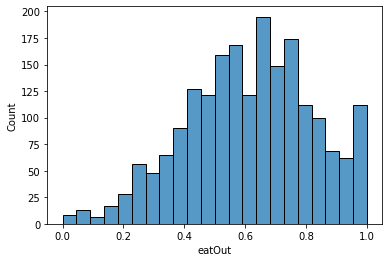

In [11]:
sb.histplot(userDf.eatOut)

In [12]:
pd.read_csv("userDf_new_V2.csv")

,userId,character,age,address,eatOut,drive,prRate,maxTravel
0,0,-0.45,23,Jurong East,0.64,1,0.91,32
1,1,-0.39,69,Bedok,0.76,1,0.40,24
2,2,0.04,37,Woodlands,0.50,1,0.86,30
3,3,-0.34,37,Geylang,0.64,1,0.61,29
4,4,-0.25,18,Jurong West,0.72,0,0.72,54
...,...,...,...,...,...,...,...,...
1995,1995,0.25,32,Ang Mo Kio,0.85,1,0.71,31
1996,1996,-0.48,29,Ang Mo Kio,0.37,1,0.60,32
1997,1997,-0.37,66,Ang Mo Kio,0.82,1,0.22,25
1998,1998,-0.27,23,Ang Mo Kio,1.00,0,0.84,52


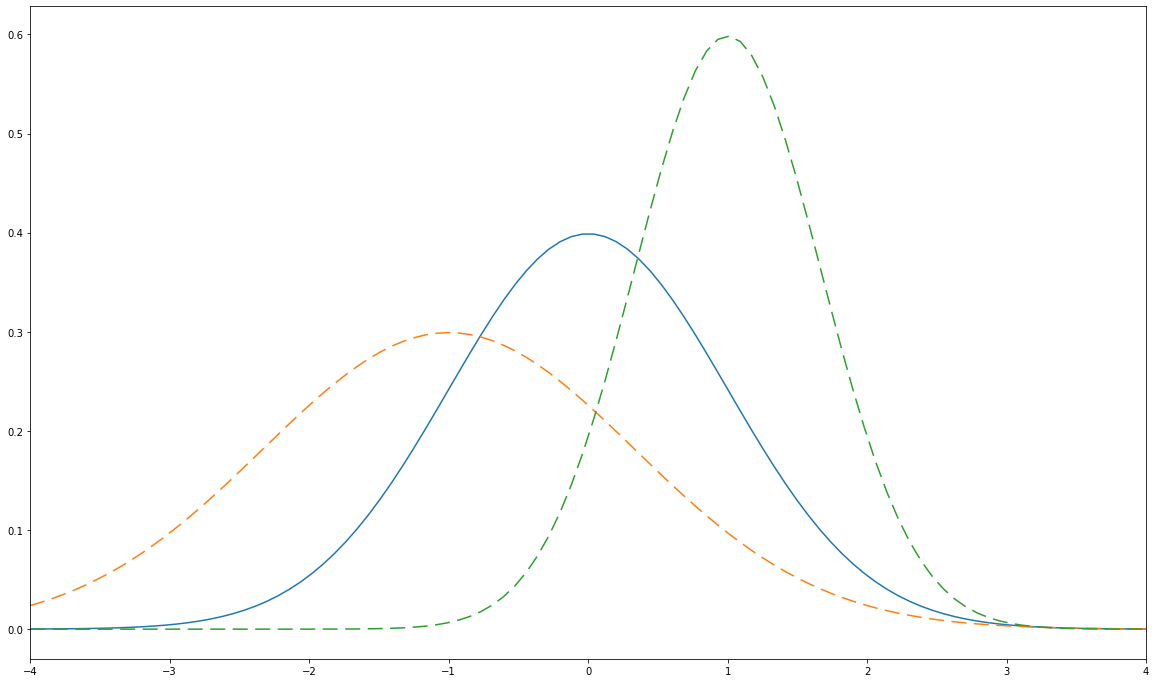

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

f = plt.figure(figsize = (20,12))
plt.xlim(-4.0, 4.0)
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, -1, sigma/0.75), dashes=[10,5,10,5])

plt.plot(x, stats.norm.pdf(x, 1, sigma/1.5), dashes=[10,5,10,5])
plt.show()

### Calculating a user's possible score on a restautant
We will assume that the score of a restaurant will follow a normal distribution. A user's rating, will be based on probability accounting for their strictness value. <br>
A user with a higher strictness value (e.g. 0.5) will have an average of lower score with a greater spread, as seen from the orange graph.<br>
On the contrary, a user with lower strictness value (e.g. -0.5) will have an average of higher score with lower spread, as seen from the green graph.

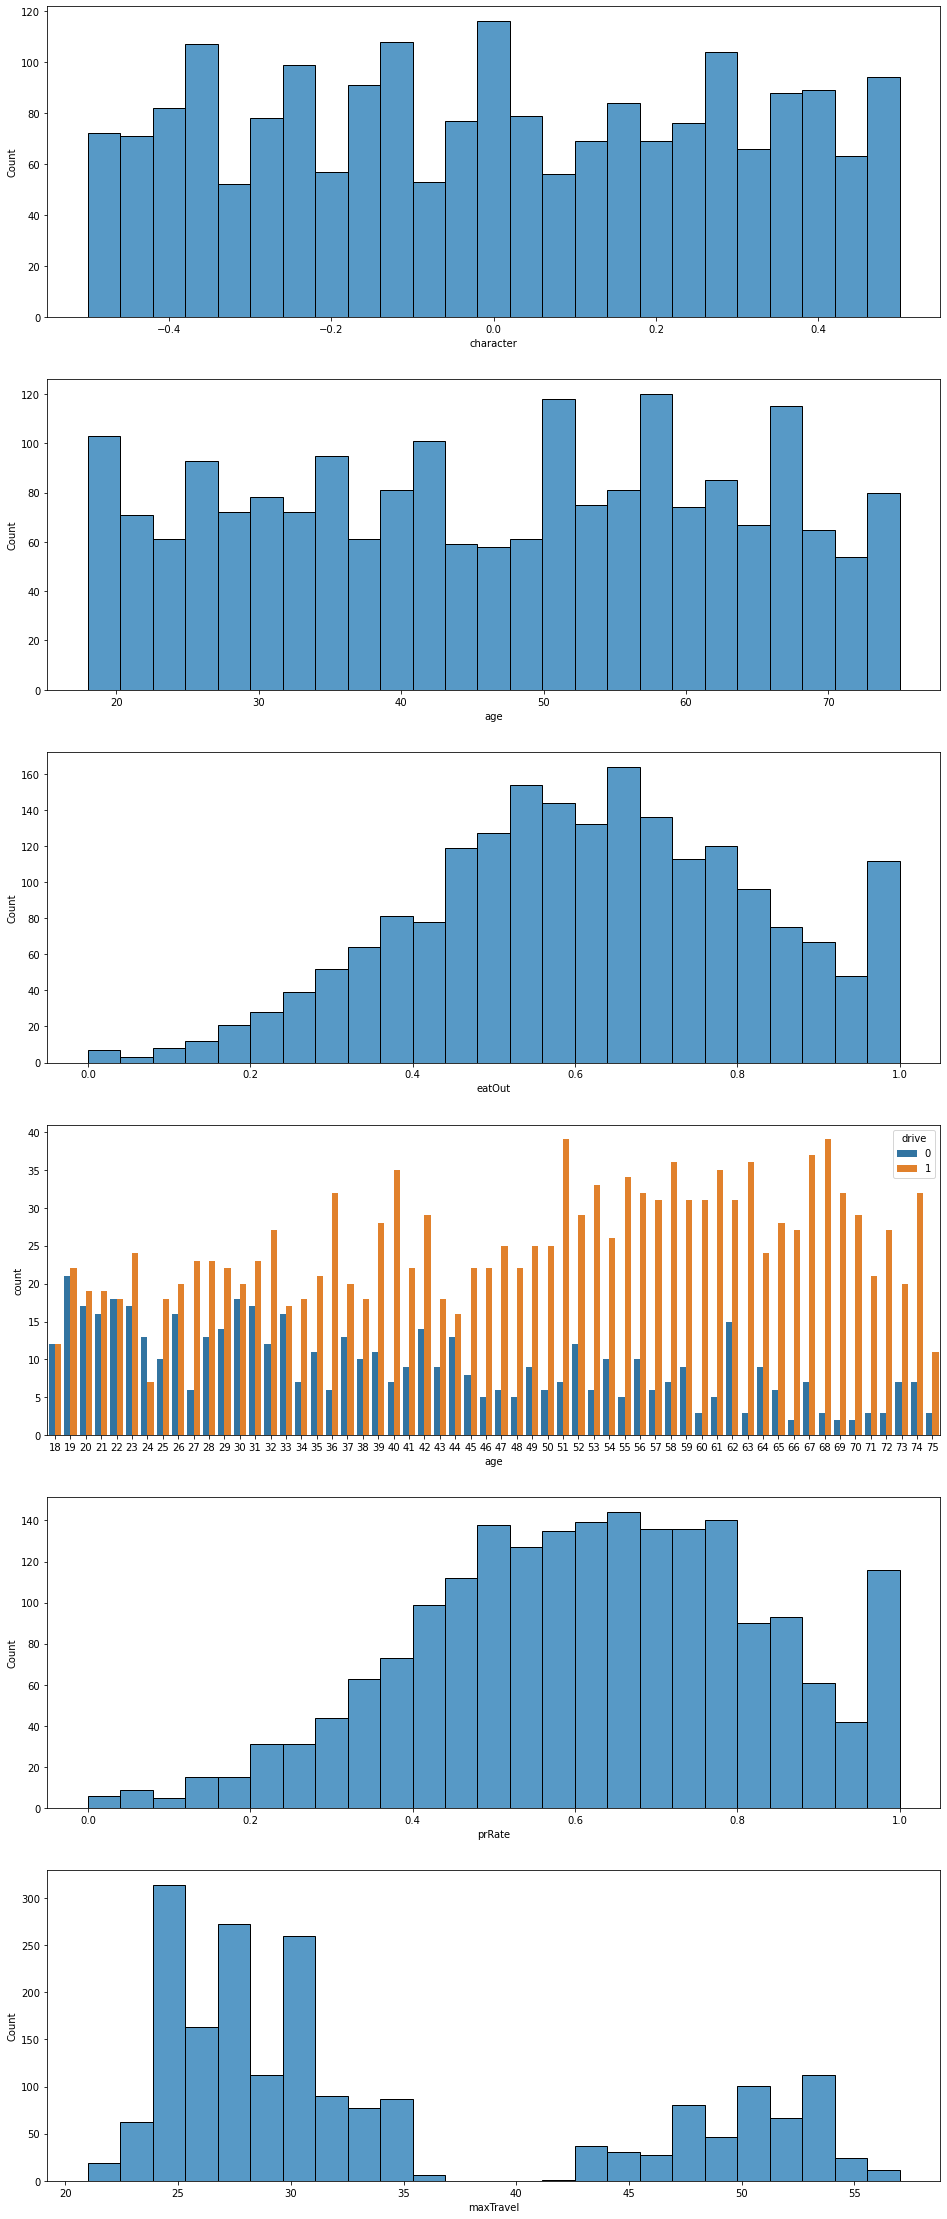

In [14]:
users = pd.read_csv("userDf_new_V2.csv")
f, axes = plt.subplots(6, 1, figsize = (16, 40))
sb.histplot(data = users, x = 'character', bins = 25, ax = axes[0])
sb.histplot(data = users, x = 'age', bins = 25, ax = axes[1])
sb.histplot(data = users, x = 'eatOut', bins = 25, ax = axes[2])
sb.countplot(data = users, x = 'age', hue = 'drive', ax = axes[3])
sb.histplot(data = users, x = 'prRate', bins = 25, ax = axes[4])
sb.histplot(data = users, x = 'maxTravel', bins = 25, ax = axes[5])
plt.show()

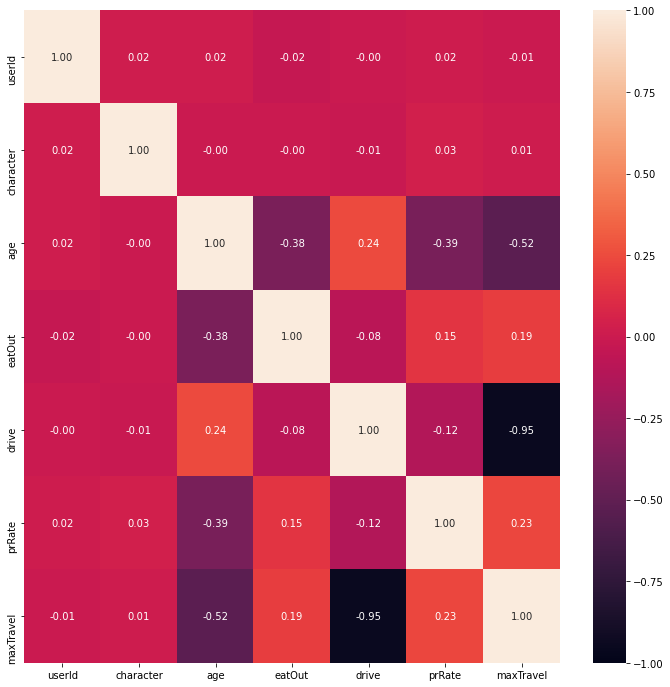

In [15]:
f = plt.figure(figsize = (12,12))
sb.heatmap(users.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Other considerations are very dependent on the age variable, as seen from the correlation. How likely a user chooses to eat out, rate a restaurant or how much time they are willing to travel are all dependent on how old a person is. 

